In [1]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt

# Example: NonMarkovianMCSolver

Define a master equation with negative rates for a qubit

In [2]:
kappa = 1.0 / 0.129 # Coupling rate to heat bath
nth = 0.063         # Temperature with <n>=0.063

#Define the rate functions
def interval(t):  # coefficient function
    return (12 * np.exp(-2*t**3) * (-np.sin(15*t)**2) + kappa * (nth+1))
def interval2(t):  # coefficient function
    return (kappa * nth)

N = 2 # Hilbert space dimension
ntraj = 10000 # number of MC trajectories
tlist = np.linspace(0,1,101)

a0 = qt.destroy(N)
H = a0.dag() * a0  # Simple oscillator Hamiltonian
psi0 = qt.basis(N, 1)

e_ops = [a0.dag() * a0, a0 * a0.dag()]
ops_and_rates = []
ops_and_rates.append( [a0,       interval ] )
ops_and_rates.append( [a0.dag(), interval2] )

### Solve with NonMarkovianMCSolver

In [3]:
options={'progress_bar': True, 'norm_steps': 10}
solver = qt.NonMarkovianMCSolver(H, ops_and_rates, options=options)
MCSol = solver.run(psi0, tlist=tlist, ntraj=ntraj, e_ops=e_ops)

10.0%. Run time:  13.02s. Est. time left: 00:00:01:57
20.0%. Run time:  26.47s. Est. time left: 00:00:01:45
30.0%. Run time:  39.87s. Est. time left: 00:00:01:33
40.0%. Run time:  53.16s. Est. time left: 00:00:01:19
50.0%. Run time:  66.51s. Est. time left: 00:00:01:06
60.0%. Run time:  79.80s. Est. time left: 00:00:00:53
70.0%. Run time:  93.41s. Est. time left: 00:00:00:40
80.0%. Run time: 106.68s. Est. time left: 00:00:00:26
90.0%. Run time: 120.15s. Est. time left: 00:00:00:13
100.0%. Run time: 133.43s. Est. time left: 00:00:00:00
Total run time: 133.45s


### Solve with mesolve

In [4]:
d_ops = []
d_ops.append([qt.lindblad_dissipator(a0, a0), interval])
d_ops.append(np.sqrt(kappa * nth) * a0.dag())

MESol = qt.mesolve(H, psi0, tlist, d_ops, e_ops, options={ 'progress_bar': False })

### Compare

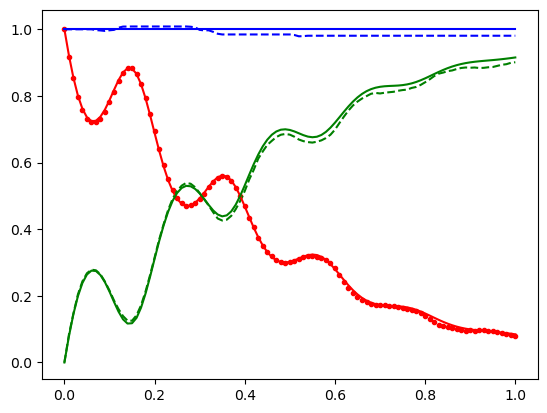

In [5]:
plt.plot(tlist, MCSol.expect[0], 'r.')
plt.plot(tlist, MCSol.expect[1], 'g--')
plt.plot(tlist, MCSol.expect[0] + MCSol.expect[1], 'b--')

plt.plot(tlist, MESol.expect[0], 'r')
plt.plot(tlist, MESol.expect[1], 'g')
plt.plot(tlist, np.ones(len(tlist)), 'b')

plt.show()